In [1]:
import matplotlib.pyplot as plt
import numpy as np

Check travelled lentghs (calculation from Andrii's thesis)

In [2]:
from generator import get_length_travelled

In [3]:
cos_zens = np.linspace(-1., 1., 100)

In [4]:
lengths = get_length_travelled(np.arccos(cos_zens))

Text(0, 0.5, 'Distance travelled [km]')

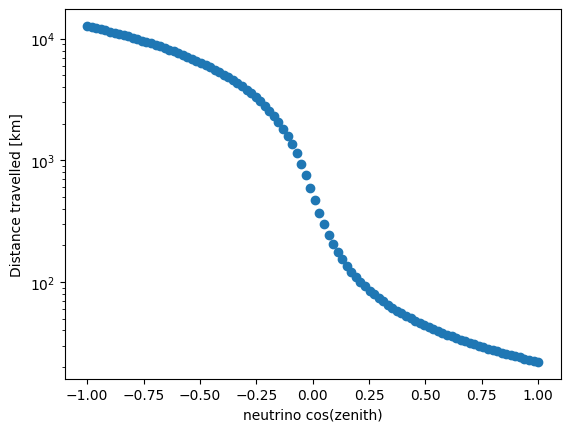

In [5]:
plt.scatter(cos_zens, lengths)
plt.yscale('log')
plt.xlabel('neutrino cos(zenith)')
plt.ylabel('Distance travelled [km]')

Check oscillation probabilities

In [6]:
from generator import survival_probability

In [7]:
lengths = np.linspace(0., 5., 100)
prop = survival_probability(lengths, np.ones_like(lengths),
    delta_msq=1., sinsq_2theta=0.3)

Compare Figure 3.1 in Andrii's thesis, (assuming he used an energy of 1GeV...)

Text(0, 0.5, 'Survival propability')

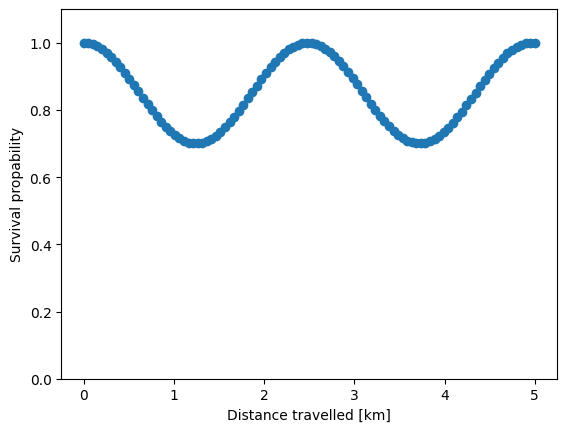

In [8]:
plt.scatter(lengths, prop)
plt.ylim(0., 1.1)
plt.xlabel('Distance travelled [km]')
plt.ylabel('Survival propability')

Check event generation

In [9]:
from generator import Response

In [10]:
response = Response(0., 0.1)

In [11]:
response

Response(mu=0.0, sigma=0.1)

In [12]:
from generator import Generator

In [13]:
gen = Generator(10000, 2.7, response)

Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and 0.0
sum of weights generated: 10000.00
  sum of weights oscillated: 4977.22


In [14]:
events = gen.get_events()

Check power law distribution

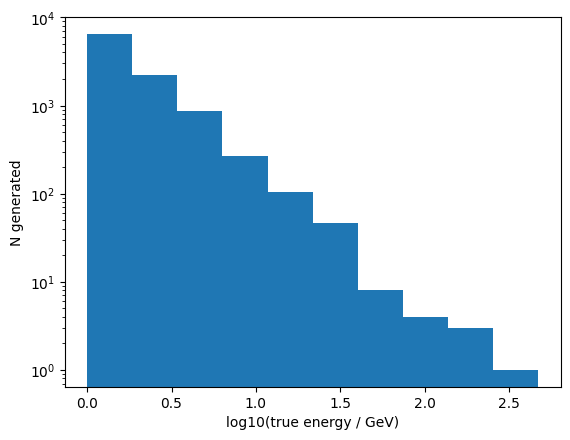

In [15]:
plt.hist(np.log10(events['true_energy']))
plt.yscale('log')
plt.xlabel('log10(true energy / GeV)')
plt.ylabel('N generated')

plt.show()

Test 2D oscillogram obtained from generator

In [16]:
coszen_vals = np.linspace(-1., 0., 100)
energy_vals = np.logspace(0.7, 2.5, 50)

length_vals = get_length_travelled(np.arccos(coszen_vals))

In [17]:
coszen_grid, energy_grid = np.meshgrid(coszen_vals, energy_vals)
length_grid, energy_grid = np.meshgrid(length_vals, energy_vals)

In [18]:
survival_prop_values = gen.survival_prob(length_grid, energy_grid)

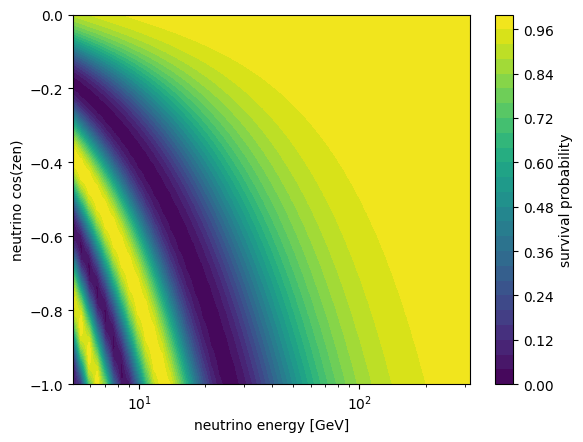

In [19]:
h = plt.contourf(energy_grid, coszen_grid, survival_prop_values, levels=30)

plt.colorbar(label='survival probability')

plt.xlabel('neutrino energy [GeV]')
plt.xscale('log')
plt.ylabel('neutrino cos(zen)')

plt.show()

Check detector response, i.e. reconstructed energy:

Text(0, 0.5, 'expected events')

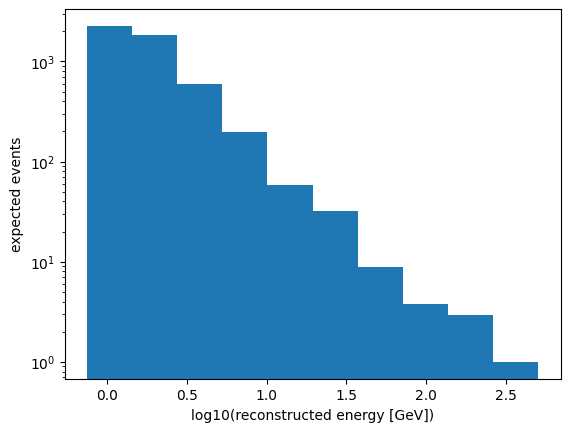

In [20]:
plt.hist(np.log10(events['reco_energy']), weights=events['weights'])
plt.yscale('log')
plt.xlabel('log10(reconstructed energy [GeV])')
plt.ylabel('expected events')
# plt.xlim(1., 2.)

Check a small range of true energies:

Text(0, 0.5, 'expected events')

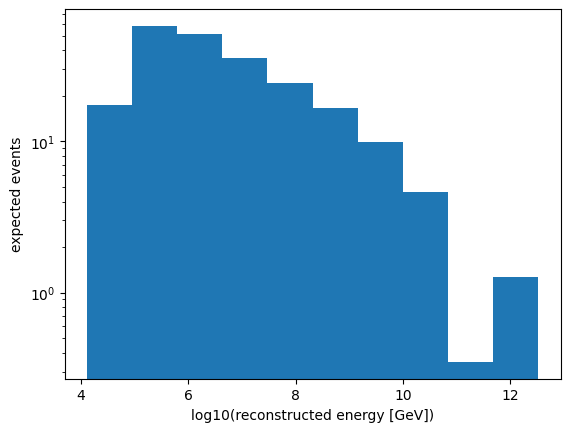

In [21]:
mask = events['true_energy'] > 5
mask = np.logical_and(mask, events['true_energy'] < 10)

plt.hist((events['reco_energy'][mask]), weights=events['weights'][mask])
plt.yscale('log')
plt.xlabel('log10(reconstructed energy [GeV])')
plt.ylabel('expected events')
# plt.xlim(1., 2.)

# Histograms

In [22]:
bin_edges = np.logspace(1., 2., 26)

In [23]:
bin_edges

array([ 10.        ,  10.96478196,  12.02264435,  13.18256739,
        14.45439771,  15.84893192,  17.37800829,  19.05460718,
        20.89296131,  22.90867653,  25.11886432,  27.54228703,
        30.1995172 ,  33.11311215,  36.30780548,  39.81071706,
        43.65158322,  47.86300923,  52.48074602,  57.54399373,
        63.09573445,  69.18309709,  75.8577575 ,  83.17637711,
        91.20108394, 100.        ])

In [24]:
bin_idx = np.digitize(events['reco_energy'], bin_edges)

In [25]:
hist = np.bincount(bin_idx, weights=events['weights'])

In [26]:
hist

array([4.86771326e+03, 1.23411072e+01, 9.27689522e+00, 1.01359373e+01,
       1.20170590e+01, 1.10723128e+01, 2.75254999e+00, 2.68860507e+00,
       2.75142663e+00, 6.16530000e+00, 6.93942971e+00, 3.33617782e+00,
       2.85350867e+00, 5.07647344e+00, 5.53431470e+00, 1.31467534e+00,
       2.54916371e+00, 1.87198119e+00, 1.51573890e+00, 0.00000000e+00,
       7.80419648e-01, 8.45777618e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.85645387e+00, 5.83085768e+00])

Text(0, 0.5, 'count')

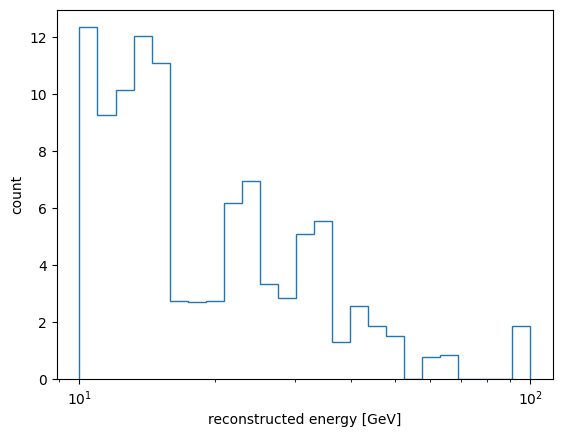

In [27]:
# first and last bin are overflow bins in hist
plt.stairs(hist[1:-1], bin_edges)
plt.xscale('log')
plt.xlabel('reconstructed energy [GeV]')
plt.ylabel('count')

## Test different detector responses:

In [28]:
responses = {
    "1": Response(0., 0.1),
    "2": Response(0.1, 0.1),
    "3": Response(-0.1, 0.1),
    "4": Response(0.2, 0.2),
    "5": Response(0.5, 0.2),
}

In [29]:
# use a hard index here to magnifiy effect of oscillation valley

index = 1.3

In [30]:
discrete_sets = {}
for k,r in responses.items():
    discrete_sets[k] = Generator(100000, index, r)


Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and 0.0
sum of weights generated: 100000.00
  sum of weights oscillated: 59991.05
Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and 0.0
sum of weights generated: 100000.00
  sum of weights oscillated: 59904.12
Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and 0.0
sum of weights generated: 100000.00
  sum of weights oscillated: 60014.98
Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and 0.0
sum of weights generated: 100000.00
  sum of weights oscillated: 60020.81
Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and 0.0
sum of weights generated: 100000.00
  sum of weights oscillated: 60009.54


In [31]:
bin_edges = np.logspace(1., 2., 26)

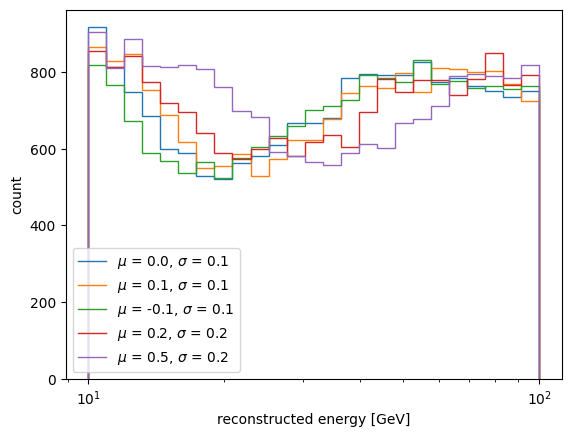

In [32]:
for k, gen in discrete_sets.items():
    events = gen.get_events()
    bin_idx = np.digitize(events['reco_energy'], bin_edges)
    hist = np.bincount(bin_idx, weights=events['weights'])
    # first and last bin are overflow bins in hist
    plt.stairs(hist[1:-1], bin_edges, label=fr"$\mu$ = {responses[k].mu}, $\sigma$ = {responses[k].sigma}")

plt.xscale('log')
plt.xlabel('reconstructed energy [GeV]')
plt.ylabel('count')

plt.legend(loc='lower left')